In [113]:
# Importamos las librerias que vamos a utilizar en el proyecto

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model


In [114]:
#Nombramos al df con la informacion extraida de csv
df = pd.read_csv ("D:\\Users\\san-p\\Desktop\\MAESTRIA UIDE\\SISTEMAS DE APRENDIZAJE\\Proyecto Sistemas Apre_SantiagoPalacios\\wdbc.data")
#Definimos los encabezados descritos en el archivo (wpbc.data)
encabezados = ['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se', 'symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']
# Colocamos al df los encabezados
df.columns= encabezados


In [115]:
# imprimimos la imformacion del df con los encabezados colocados
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [116]:
# Aqui describimos en que formato se encuentran cargados los datos en el df y validamos si existen valores nulos 
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       568 non-null    int64  
 1   diagnosis                568 non-null    object 
 2   radius_mean              568 non-null    float64
 3   texture_mean             568 non-null    float64
 4   perimeter_mean           568 non-null    float64
 5   area_mean                568 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         568 non-null    float64
 8   concavity_mean           568 non-null    float64
 9   concave points_mean      568 non-null    float64
 10  symmetry_mean            568 non-null    float64
 11  fractal_dimension_mean   568 non-null    float64
 12  radius_se                568 non-null    float64
 13  texture_se               568 non-null    float64
 14  perimeter_se             5

In [117]:
#Remplazamos en la columna diagnosis el valor M = 1 y B = 0
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
#df['Class'] = df['Class'].apply(lambda x: 1 if x == 2 else 0)

In [118]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [119]:
# Leemos el df para determinar los caracteres de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       568 non-null    int64  
 1   diagnosis                568 non-null    int64  
 2   radius_mean              568 non-null    float64
 3   texture_mean             568 non-null    float64
 4   perimeter_mean           568 non-null    float64
 5   area_mean                568 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         568 non-null    float64
 8   concavity_mean           568 non-null    float64
 9   concave points_mean      568 non-null    float64
 10  symmetry_mean            568 non-null    float64
 11  fractal_dimension_mean   568 non-null    float64
 12  radius_se                568 non-null    float64
 13  texture_se               568 non-null    float64
 14  perimeter_se             5

In [120]:
df.fillna(0,inplace= True )


In [121]:
#Trasformamos al archivo en entero para poder correr el modelo
df=df.astype('int')

In [122]:
#Leemos el archivo para ver el cambio
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   id                       568 non-null    int32
 1   diagnosis                568 non-null    int32
 2   radius_mean              568 non-null    int32
 3   texture_mean             568 non-null    int32
 4   perimeter_mean           568 non-null    int32
 5   area_mean                568 non-null    int32
 6   smoothness_mean          568 non-null    int32
 7   compactness_mean         568 non-null    int32
 8   concavity_mean           568 non-null    int32
 9   concave points_mean      568 non-null    int32
 10  symmetry_mean            568 non-null    int32
 11  fractal_dimension_mean   568 non-null    int32
 12  radius_se                568 non-null    int32
 13  texture_se               568 non-null    int32
 14  perimeter_se             568 non-null    int32
 15  area_s

In [123]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,1,20,17,132,1326,0,0,0,0,...,24,23,158,1956,0,0,0,0,0,0
1,84300903,1,19,21,130,1203,0,0,0,0,...,23,25,152,1709,0,0,0,0,0,0
2,84348301,1,11,20,77,386,0,0,0,0,...,14,26,98,567,0,0,0,0,0,0
3,84358402,1,20,14,135,1297,0,0,0,0,...,22,16,152,1575,0,0,0,0,0,0
4,843786,1,12,15,82,477,0,0,0,0,...,15,23,103,741,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,1,21,22,142,1479,0,0,0,0,...,25,26,166,2027,0,0,0,0,0,0
564,926682,1,20,28,131,1261,0,0,0,0,...,23,38,155,1731,0,0,0,0,0,0
565,926954,1,16,28,108,858,0,0,0,0,...,18,34,126,1124,0,0,0,0,0,0
566,927241,1,20,29,140,1265,0,0,0,0,...,25,39,184,1821,0,0,0,0,0,0


In [124]:
# Eliminamos la primera coluna de df
df.drop("id",axis=1,inplace=True)

In [125]:
# Validamos la eliminacion realizada llamando a la informacion del df
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,20,17,132,1326,0,0,0,0,0,...,24,23,158,1956,0,0,0,0,0,0
1,1,19,21,130,1203,0,0,0,0,0,...,23,25,152,1709,0,0,0,0,0,0
2,1,11,20,77,386,0,0,0,0,0,...,14,26,98,567,0,0,0,0,0,0
3,1,20,14,135,1297,0,0,0,0,0,...,22,16,152,1575,0,0,0,0,0,0
4,1,12,15,82,477,0,0,0,0,0,...,15,23,103,741,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,21,22,142,1479,0,0,0,0,0,...,25,26,166,2027,0,0,0,0,0,0
564,1,20,28,131,1261,0,0,0,0,0,...,23,38,155,1731,0,0,0,0,0,0
565,1,16,28,108,858,0,0,0,0,0,...,18,34,126,1124,0,0,0,0,0,0
566,1,20,29,140,1265,0,0,0,0,0,...,25,39,184,1821,0,0,0,0,0,0


In [126]:
# LLamamos los encabezados de df para proeceder con la particion 
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [127]:
# Realizamos la division de los datos por su categoria
features_mean= list(df.columns[1:11])
features_se= list(df.columns[11:20])
features_worst=list(df.columns[21:31])
print(features_mean)
#print("-----------------------------------")
print(features_se)
#print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [128]:
# Realizamos la descripcion de df o resumen estadistico
df.describe()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.0,568.0,568.0,568.0,568.0,...,568.000000,568.000000,568.000000,568.000000,568.0,568.000000,568.000000,568.0,568.0,568.0
mean,0.371479,13.632042,18.801056,91.431338,653.894366,0.0,0.0,0.0,0.0,0.0,...,15.769366,25.207746,106.676056,878.239437,0.0,0.001761,0.005282,0.0,0.0,0.0
std,0.483626,3.565486,4.311201,24.310503,352.058130,0.0,0.0,0.0,0.0,0.0,...,4.843364,6.151452,33.496963,568.012699,0.0,0.041959,0.072547,0.0,0.0,0.0
min,0.000000,6.000000,9.000000,43.000000,143.000000,0.0,0.0,0.0,0.0,0.0,...,7.000000,12.000000,50.000000,185.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
25%,0.000000,11.000000,16.000000,75.000000,419.750000,0.0,0.0,0.0,0.0,0.0,...,13.000000,21.000000,84.000000,514.750000,0.0,0.000000,0.000000,0.0,0.0,0.0
50%,0.000000,13.000000,18.000000,86.000000,548.500000,0.0,0.0,0.0,0.0,0.0,...,14.000000,25.000000,97.000000,685.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
75%,1.000000,15.000000,21.000000,103.250000,782.000000,0.0,0.0,0.0,0.0,0.0,...,18.000000,29.000000,125.000000,1073.500000,0.0,0.000000,0.000000,0.0,0.0,0.0
max,1.000000,28.000000,39.000000,188.000000,2501.000000,0.0,0.0,0.0,0.0,0.0,...,36.000000,49.000000,251.000000,4254.000000,0.0,1.000000,1.000000,0.0,0.0,0.0


In [129]:
# Definimos a la variable data con nuestro conjunto de datos
data=df[["diagnosis","radius_worst", "perimeter_worst","area_worst", "texture_worst"]]

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   diagnosis        568 non-null    int32
 1   radius_worst     568 non-null    int32
 2   perimeter_worst  568 non-null    int32
 3   area_worst       568 non-null    int32
 4   texture_worst    568 non-null    int32
dtypes: int32(5)
memory usage: 11.2 KB


In [131]:
# Con esto vamos a visualizar de forma rapida cuantas (Filas) y columnas hay en nuestro conjunto de datos
data.shape

(568, 5)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

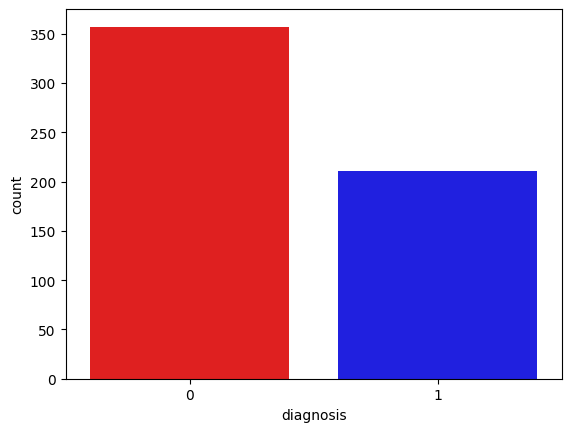

In [132]:
# Aqui contabilizamos y graficamos cuantos registos con diagnosis 0 y cuantos con diagnosis 1
import seaborn as sns

sns.countplot(x="diagnosis",data=data,label="count",palette={"blue","red"})




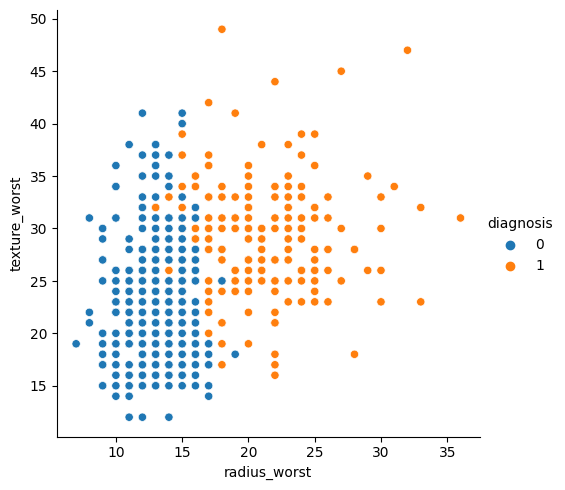

In [133]:
#sns.pairplot(data=data,hue="diagnosis")

sns.relplot(x="radius_worst",y="texture_worst",data=data,hue="diagnosis")



In [134]:
# cambiar las variables x y y

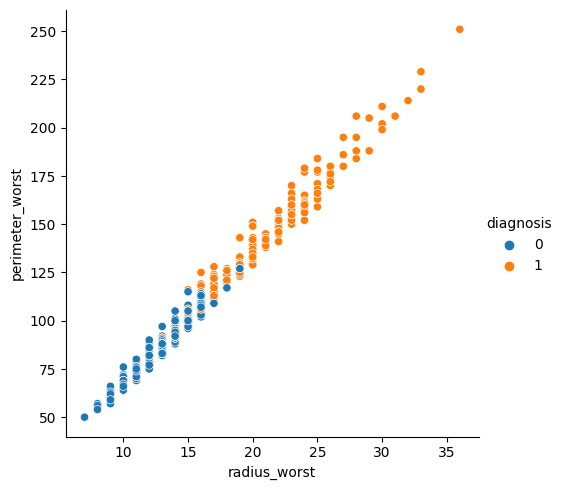

In [135]:

sns.relplot(x="radius_worst",y="perimeter_worst",data=data,hue="diagnosis")


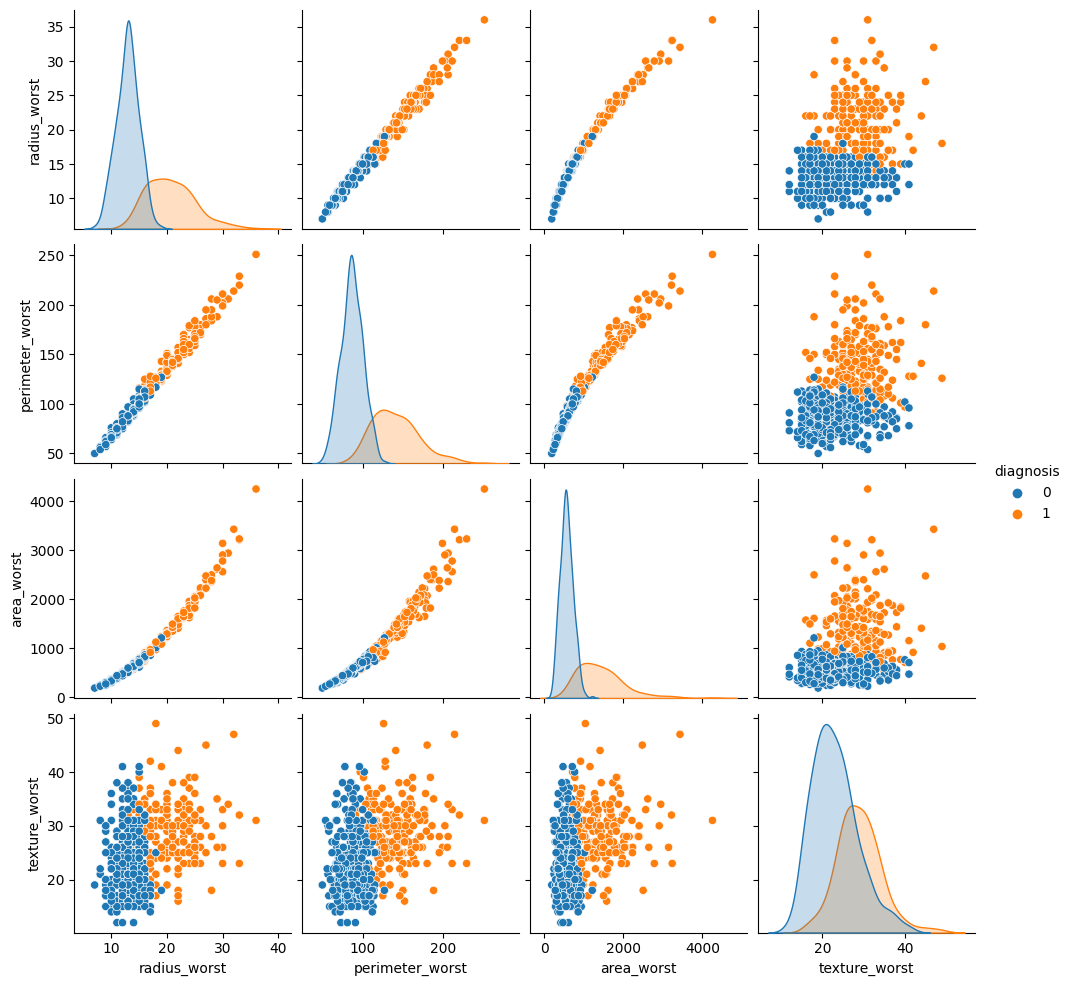

In [136]:
sns.pairplot(data=data,hue="diagnosis")



In [137]:
#Definimos las variables para x y 
x=data[['radius_worst','texture_worst','perimeter_worst']]
y=data ['diagnosis']

<AxesSubplot:>

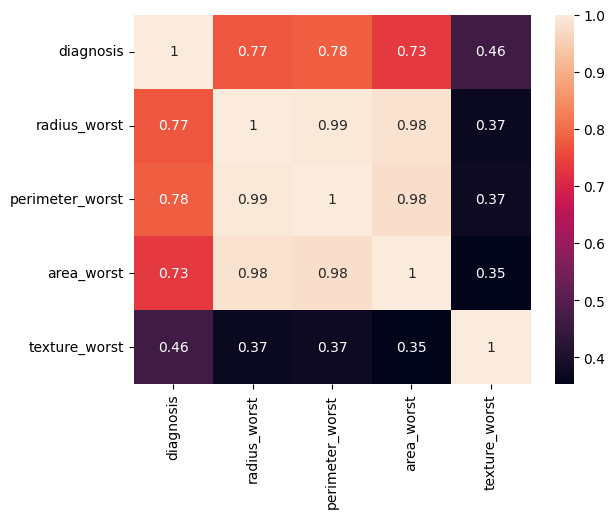

In [138]:
# Desarrollamos la matriz de correlacion 
import seaborn as sns
corr = data.corr()
sns.heatmap(corr,annot = True)


In [139]:
#Mandamos a entrenal al modelo
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3, random_state=42)

In [140]:
#Modelo 1 
#Importamos la libreria
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import time

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [141]:
#Realizamos el Escalonamiento de datos.
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

In [142]:
#Realizamos la clasificacion 
clf = SGDClassifier(loss="log")
clf.fit(trainX, trainY)

C:\Users\san-p\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log')

In [143]:
# Hacemos el Accuracy
y_pred = clf.predict(testX)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.91


In [144]:
# Declaramos la matriz de confucion del primer modelo
from sklearn.metrics import confusion_matrix
confusion_matrix(testY,y_pred)

array([[102,   1],
       [ 15,  53]], dtype=int64)

In [145]:
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import precision_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler


In [146]:
X = df[df.columns.drop("diagnosis")]
y = df["diagnosis"]

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test_copy = X_test.copy()
y_test_copy = y_test.copy()

# oversampler = SMOTE(sampling_strategy=0.4)
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversampler.fit_resample(X_train, y_train)
X_test, y_test = oversampler.fit_resample(X_test, y_test)

In [148]:
pca = PCA(n_components=3)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   diagnosis                568 non-null    int32
 1   radius_mean              568 non-null    int32
 2   texture_mean             568 non-null    int32
 3   perimeter_mean           568 non-null    int32
 4   area_mean                568 non-null    int32
 5   smoothness_mean          568 non-null    int32
 6   compactness_mean         568 non-null    int32
 7   concavity_mean           568 non-null    int32
 8   concave points_mean      568 non-null    int32
 9   symmetry_mean            568 non-null    int32
 10  fractal_dimension_mean   568 non-null    int32
 11  radius_se                568 non-null    int32
 12  texture_se               568 non-null    int32
 13  perimeter_se             568 non-null    int32
 14  area_se                  568 non-null    int32
 15  smooth

In [150]:
#Trasformamos el archivo en  entero para poder correr el modelo
df=df.astype('int')

In [151]:
df.info

<bound method DataFrame.info of      diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1           20            17             132       1326   
1            1           19            21             130       1203   
2            1           11            20              77        386   
3            1           20            14             135       1297   
4            1           12            15              82        477   
..         ...          ...           ...             ...        ...   
563          1           21            22             142       1479   
564          1           20            28             131       1261   
565          1           16            28             108        858   
566          1           20            29             140       1265   
567          0            7            24              47        181   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0                  0    

In [152]:
pca.fit(X_train)

PCA(n_components=3)

In [153]:
from sklearn import tree
from dtreeviz.trees import dtreeviz

In [154]:
#MODELO 2 

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import graphviz


In [155]:
def draw_tree(X, y, tree: DecisionTreeClassifier):
    viz = dtreeviz(tree, X, y,
                   target_name="diagnosis",
                   feature_names=[str(x) for x in range(X.shape[1])],
                   class_names=list(map(str, list(set(y)))))
    return viz


3


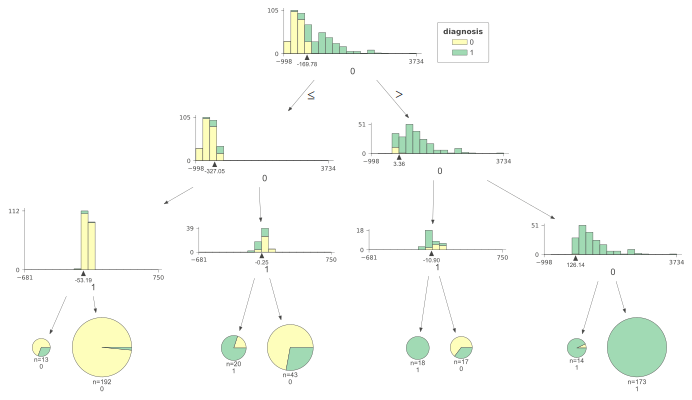

In [156]:

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(pca.transform(X_train), y_train)
print(clf.get_depth())
viz = draw_tree(pca.transform(X_train), y_train, clf)
viz

In [157]:
y_pred = clf.predict(testX)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))


Accuracy: 0.61


In [158]:
#MATRIZ DE CONFUSION FIN DEL segundo MOEDLO
from sklearn.metrics import confusion_matrix
confusion_matrix(testY,y_pred)  # modelo con prediccion en falso negativos alta


array([[103,   0],
       [ 67,   1]], dtype=int64)

In [159]:
# Tercer Modelo 

clf = RandomForestClassifier(max_depth=9)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)



C:\Users\san-p\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


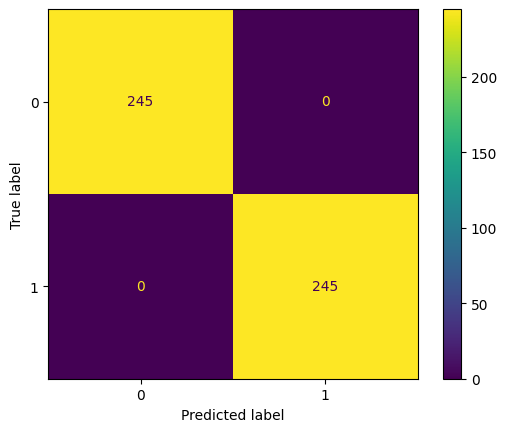

In [160]:
plot_confusion_matrix(clf, X_train, y_train)


In [161]:
y_pred = clf.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred))) # MOdelo mas preciso por que accuracy se acerca mas al 1 (100%)

Accuracy: 0.94


In [ ]:
# MODELO 4
clf = KNeighborsClassifier (n_neighbors=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


C:\Users\san-p\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


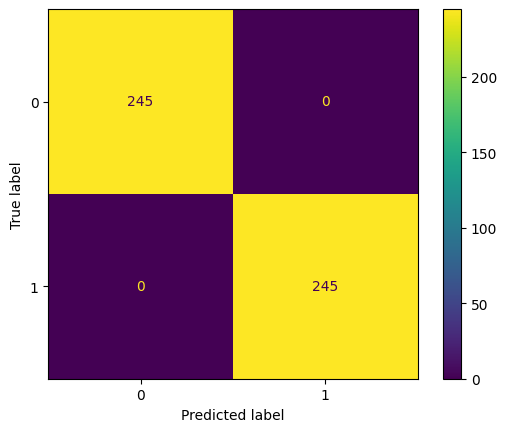

In [ ]:
plot_confusion_matrix(clf, X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred))) # MOdelo mas preciso por que accuracy se acerca mas al 1 (100%)

Accuracy: 0.84


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testY,y_pred)  # modelo con prediccion en falso negativos alta